# Magic and Imports

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Random Ternary Matrix

In [3]:
def generate_random_matrix(var, n, m=None):
    if var > 1:
        raise ValueError("Var must be <1")
    if m is None:
        m = n

    X = (np.random.rand(n, m) < var).astype(int)
    half = (np.random.rand(n, m) > 0.5)
    X[half] = -X[half]

    return X.astype(int)

In [4]:
X = generate_random_matrix(var=1, n=10)

In [5]:
X.mean(), X.var()

(-0.04, 0.9983999999999998)

# Investigating Product of Independent Random Matrices

In [6]:
n = 128
ns = np.random.randint(low=512, high=513, size=10)

Xs = [generate_random_matrix(var=1/2, n=n) for _ in range(3)]

last_n = n
for n_i in ns:
    X = generate_random_matrix(var=1/last_n, n=last_n, m=n_i)
    Xs.append(X)
    last_n = n_i


In [7]:
for i, X in enumerate(Xs):
    print(f"{i} : dim {X.shape} m {np.abs(X.mean()):.2f} s {X.std():.2g}")

0 : dim (128, 128) m 0.00 s 0.71
1 : dim (128, 128) m 0.00 s 0.71
2 : dim (128, 128) m 0.00 s 0.7
3 : dim (128, 512) m 0.00 s 0.09
4 : dim (512, 512) m 0.00 s 0.044
5 : dim (512, 512) m 0.00 s 0.045
6 : dim (512, 512) m 0.00 s 0.043
7 : dim (512, 512) m 0.00 s 0.044
8 : dim (512, 512) m 0.00 s 0.043
9 : dim (512, 512) m 0.00 s 0.043
10 : dim (512, 512) m 0.00 s 0.045
11 : dim (512, 512) m 0.00 s 0.046
12 : dim (512, 512) m 0.00 s 0.044


In [8]:
Ys = []
Y = np.eye(n).astype(int)
for i, X in enumerate(Xs):
    Y = Y @ X
    Ys.append(Y)

In [9]:
for i, Y in enumerate(Ys):
    print(f"{i} : m {np.abs(Y.mean()):.2f} s {Y.std():.0f}")

0 : m 0.00 s 1
1 : m 0.02 s 6
2 : m 0.40 s 45
3 : m 0.19 s 45
4 : m 0.07 s 44
5 : m 0.06 s 45
6 : m 0.25 s 47
7 : m 0.02 s 45
8 : m 0.09 s 40
9 : m 0.03 s 40
10 : m 0.10 s 36
11 : m 0.16 s 36
12 : m 0.01 s 28


In [10]:
len(Ys)

13

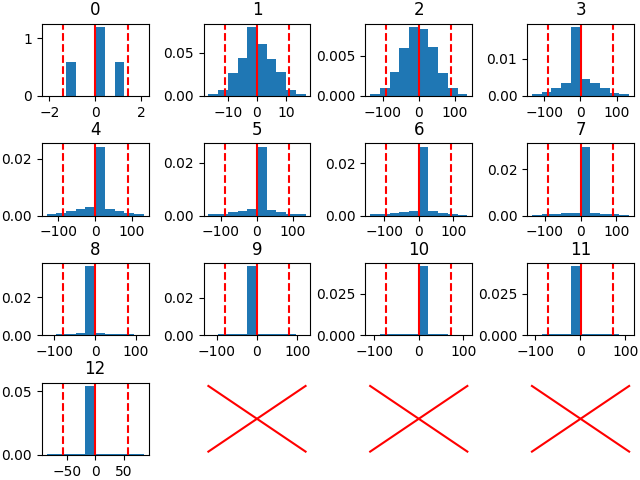

In [11]:
FIG_NAME = "distribution"
plt.close(FIG_NAME)

num_ys = len(Ys)
ceil_sqrt_num_ys = np.ceil(np.sqrt(num_ys)).astype(int)

fig, axs = plt.subplots(ceil_sqrt_num_ys, ceil_sqrt_num_ys, num=FIG_NAME)
axs = np.array(axs).flatten()

for i, (ax, Y) in enumerate(zip(axs, Ys + [None]*100)):
    if Y is None:
        ax.plot(np.linspace(-1, 1), np.linspace(-1, 1), '-', color="red")
        ax.plot(np.linspace(1, -1), np.linspace(-1, 1), '-', color="red")
        ax.axis("off")
    else:
        ax.set_title(i)

        mean = Y.mean()
        std = Y.std()

        ax.hist(Y.flatten(), range=(mean-3*std, mean+3*std), density=True)
        #ax.hist(Y.flatten(), density=True, color="cyan")

        ax.axvline(mean, color="red", ls="-")
        ax.axvline(mean+2*std, color="red", ls="--")
        ax.axvline(mean-2*std, color="red", ls="--")
        

fig.tight_layout(pad=0.1)

plt.show()

# Fraction of Empty Rows

In [12]:
x = np.arange(13) 
x = 2 ** x
y = ((x-1)/x) ** x

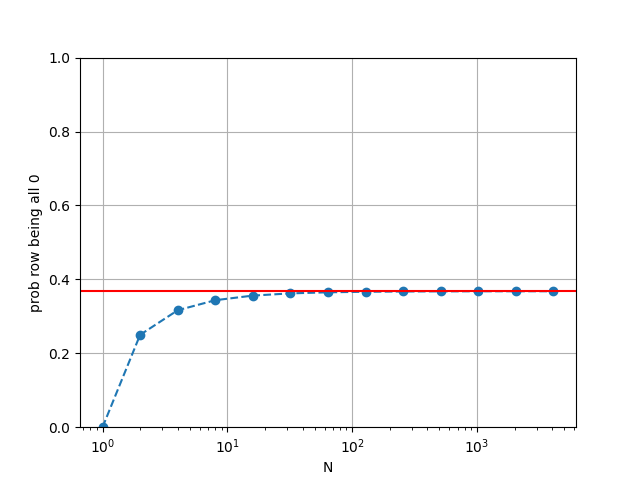

In [13]:
FIG_NAME = "1/e"
plt.close(FIG_NAME)

fig, ax = plt.subplots(1, 1, num=FIG_NAME)
ax.plot(x, y, 'o--')
ax.axhline(1/np.e, ls='-', color="red")
ax.set_xscale("log")
ax.grid()

ax.set_ylim([0, 1])

ax.set_xlabel('N')
ax.set_ylabel("prob row being all 0")

plt.show()

In [14]:
for X in Xs[-len(ns):]:
    ts = []
    for X_ in X:
        t = (X_ == 0).all()
        ts.append(t)

print(np.mean(ts))
print(1/np.e)


0.341796875
0.36787944117144233


# Bit Shifting

In [15]:
print(f"""
 -1 >> 1 = {(-1) >> 1}
  1 >> 1 = {(1) >> 1}
  0 >> 1 = {(0) >> 1}
""")


 -1 >> 1 = -1
  1 >> 1 = 0
  0 >> 1 = 0



In [16]:
ints = np.arange(-200, 200).astype(int)
shifted = np.right_shift(ints, 1)


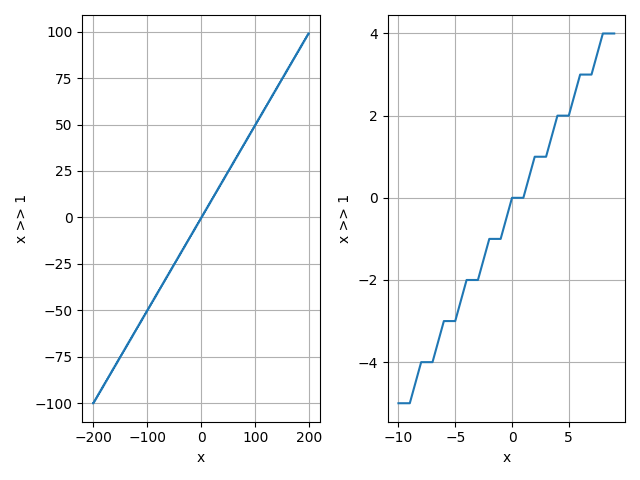

In [17]:
FIG_NAME = "bitshift"
plt.close(FIG_NAME)

fig, axs = plt.subplots(1, 2, num=FIG_NAME)

axs[0].plot(ints, shifted)
num = 20
half = len(ints) // 2
my_range = range(half - num//2, half + num//2)
axs[1].plot(ints[my_range], shifted[my_range])

for ax in axs:
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("x >> 1")

fig.tight_layout()
plt.show()

# Normalisation by Bit-Shifting

In [18]:
BIT_SHIT = 1
BIT_SHIFT_VAR = 2 ** (BIT_SHIT*2)

BIT_SHIFT_VAR, BIT_SHIT

(4, 1)

In [19]:
n = 128
ns = np.random.randint(low=512, high=513, size=10)

Xs = [generate_random_matrix(var=1, n=n) for _ in range(3)]

last_n = n
for n_i in ns:
    X = generate_random_matrix(var=BIT_SHIFT_VAR/last_n, n=last_n, m=n_i)
    Xs.append(X)
    last_n = n_i


In [20]:
for i, X in enumerate(Xs):
    print(f"{i} : dim {X.shape} m {np.abs(X.mean()):.2f} s {X.std():.2g}")

0 : dim (128, 128) m 0.01 s 1
1 : dim (128, 128) m 0.01 s 1
2 : dim (128, 128) m 0.00 s 1
3 : dim (128, 512) m 0.00 s 0.18
4 : dim (512, 512) m 0.00 s 0.09
5 : dim (512, 512) m 0.00 s 0.088
6 : dim (512, 512) m 0.00 s 0.089
7 : dim (512, 512) m 0.00 s 0.088
8 : dim (512, 512) m 0.00 s 0.089
9 : dim (512, 512) m 0.00 s 0.087
10 : dim (512, 512) m 0.00 s 0.089
11 : dim (512, 512) m 0.00 s 0.09
12 : dim (512, 512) m 0.00 s 0.088


In [21]:
Ys = []
Y = np.eye(n).astype(int)
for i, X in enumerate(Xs):
    Y = Y @ X
    Y = np.right_shift(Y, BIT_SHIT)
    Ys.append(Y)

In [22]:
for i, Y in enumerate(Ys):
    print(f"{i} : m {np.abs(Y.mean()):.2f} s {Y.std():.0f}")

0 : m 0.49 s 0
1 : m 0.48 s 4
2 : m 0.85 s 22
3 : m 0.65 s 22
4 : m 1.50 s 22
5 : m 0.70 s 22
6 : m 0.68 s 22
7 : m 0.24 s 22
8 : m 0.20 s 23
9 : m 0.06 s 22
10 : m 1.60 s 23
11 : m 1.16 s 23
12 : m 1.24 s 24


In [23]:
len(Ys)

13

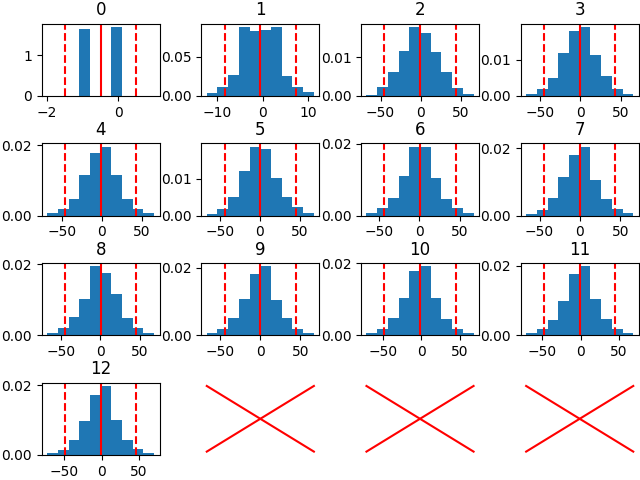

In [24]:
FIG_NAME = "distribution"
plt.close(FIG_NAME)

num_ys = len(Ys)
ceil_sqrt_num_ys = np.ceil(np.sqrt(num_ys)).astype(int)

fig, axs = plt.subplots(ceil_sqrt_num_ys, ceil_sqrt_num_ys, num=FIG_NAME)
axs = np.array(axs).flatten()

for i, (ax, Y) in enumerate(zip(axs, Ys + [None]*100)):
    if Y is None:
        ax.plot(np.linspace(-1, 1), np.linspace(-1, 1), '-', color="red")
        ax.plot(np.linspace(1, -1), np.linspace(-1, 1), '-', color="red")
        ax.axis("off")
    else:
        ax.set_title(i)

        mean = Y.mean()
        std = Y.std()

        ax.hist(Y.flatten(), range=(mean-3*std, mean+3*std), density=True)
        #ax.hist(Y.flatten(), density=True, color="cyan")

        ax.axvline(mean, color="red", ls="-")
        ax.axvline(mean+2*std, color="red", ls="--")
        ax.axvline(mean-2*std, color="red", ls="--")
        

fig.tight_layout(pad=0.1)

plt.show()

# Fraction of Empty Rows - Again

In [25]:
x = np.arange(13)  + 1
x = 2 ** x
x = x[x > 4]

y = ((x-4)/x) ** x

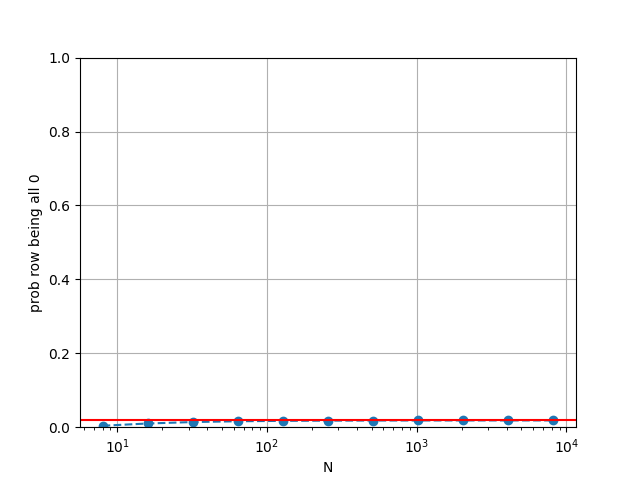

In [26]:
FIG_NAME = "e^-4"
plt.close(FIG_NAME)

fig, ax = plt.subplots(1, 1, num=FIG_NAME)
ax.plot(x, y, 'o--')
ax.axhline(np.exp(-4), ls='-', color="red")
ax.set_xscale("log")
ax.grid()

ax.set_ylim([0, 1])

ax.set_xlabel('N')
ax.set_ylabel("prob row being all 0")

plt.show()

In [27]:
np.exp(-4)

0.01831563888873418

In [28]:
bitshifts = np.arange(0, 5)
bitshift_vars = 2 ** (bitshifts*2)

probs = np.exp(-bitshift_vars)

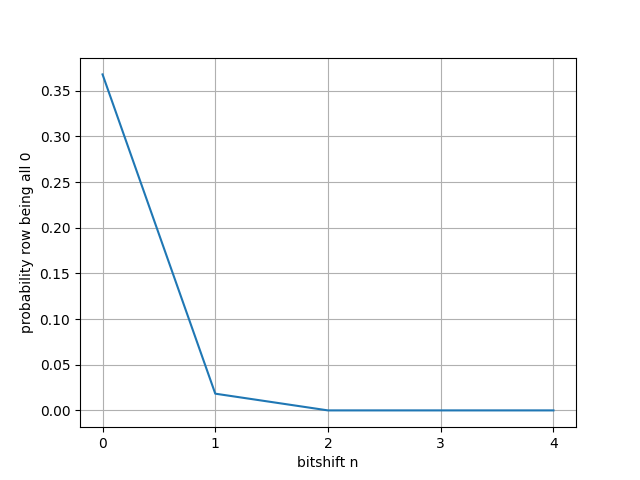

In [29]:
FIG_NAME = "bitshift zero rows"
plt.close(FIG_NAME)

fig, ax = plt.subplots(1, 1, num=FIG_NAME)

ax.plot(bitshifts, probs)
ax.set_xlabel("bitshift n")
ax.set_ylabel("probability row being all 0")

ax.grid()
ax.set_xticks(bitshifts)
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
n = 2 ** (np.arange(20) + 1)
bits_int = np.ceil(2*np.log(n)/np.log(2))
sparsity_for_equality = (2 / (1 + bits_int))

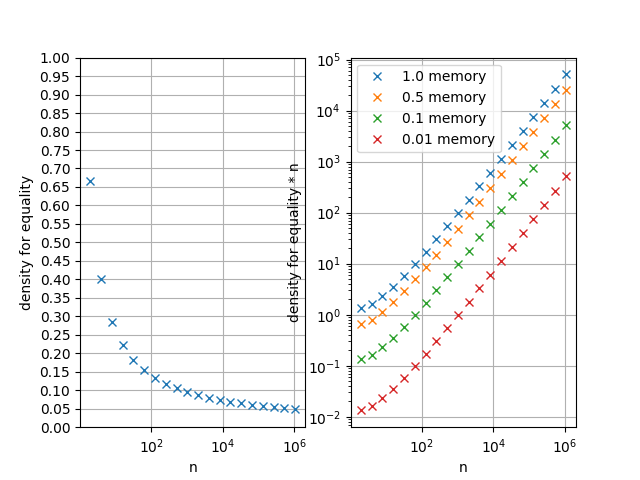

In [32]:
FIG_NAME = "sparsity"
plt.close(FIG_NAME)

fig, axs = plt.subplots(1, 2, num=FIG_NAME)

axs[0].plot(n, sparsity_for_equality, 'x')
axs[0].set_ylabel("density for equality")
axs[0].set_yticks(np.arange(21)/20)

axs[1].plot(n, sparsity_for_equality * n, 'x', label = "1.0 memory")
axs[1].plot(n, sparsity_for_equality * n / 2, 'x', label = "0.5 memory")
axs[1].plot(n, sparsity_for_equality * n / 10, 'x', label = "0.1 memory")
axs[1].plot(n, sparsity_for_equality * n / 100, 'x', label = "0.01 memory")
axs[1].set_ylabel("density for equality * n")
axs[1].set_yscale("log")
axs[1].legend()

for ax in axs:
    ax.set_xscale("log")
    ax.set_xlabel("n")
    ax.grid()

plt.show()

In [33]:
xx, yy = np.meshgrid(np.linspace(0, 7), np.linspace(0, 5))

In [34]:
xx_e = xx / np.log10(np.e)
yy_e = yy / np.log10(np.e)

bits_per_int = np.ceil(2*(xx_e)/(np.log(2)))
ln_memory_save = yy_e - np.log(2 / (1+bits_per_int)) - xx_e
log10_memory_save = ln_memory_save / np.log(10)

In [35]:
ln_memory_save.min()

-12.940041820610375

In [36]:
from matplotlib.colors import TwoSlopeNorm

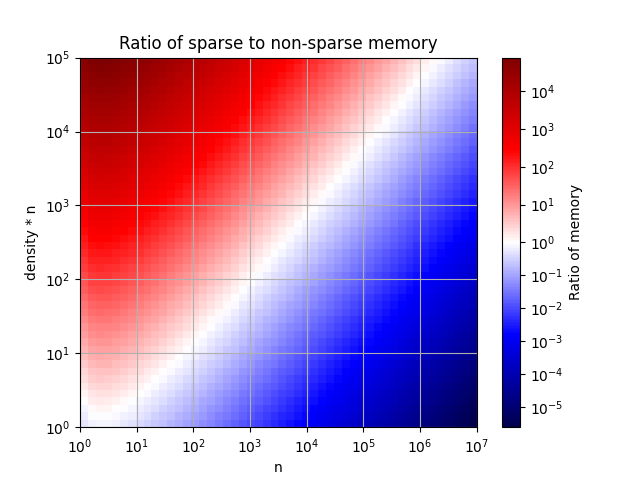

In [37]:
FIG_NAME = "image"
plt.close(FIG_NAME)

plt.subplots(1, 1, num=FIG_NAME)

plt.imshow(
    log10_memory_save, 
    cmap="seismic",
    norm=TwoSlopeNorm(vcenter=0),
    extent=(xx.min(), xx.max(), yy.max(), yy.min()),
    aspect="auto",
)

ax = plt.gca()
ax.invert_yaxis()

xticks = np.arange(xx.min(), xx.max()+1)
yticks = np.arange(yy.min(), yy.max()+1)

ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{int(p)}$" for p in xticks])
ax.set_yticks(yticks)
ax.set_yticklabels([f"$10^{int(p)}$" for p in yticks])

ax.set_xlabel("n")
ax.set_ylabel("density * n")

cticks = np.arange(np.floor(log10_memory_save.min()), np.ceil(log10_memory_save.max()), 1)
cbar = plt.colorbar(ticks=cticks)
cbar.ax.set_yticklabels(labels=[f"$10^{{{int(p)}}}$" for p in cticks])
cbar.ax.set_ylabel("Ratio of memory")

ax.grid()

plt.title("Ratio of sparse to non-sparse memory")

plt.show()

In [38]:

n = 2 ** (np.arange(20) + 1)
bits_int = np.ceil(2*np.log(n)/np.log(2))
sparsity_for_equality = (2 / (1 + bits_int))